In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import joblib

In [2]:
df = pd.read_excel('/Users/maryjones/Elbrus/Study_files/ds-phase-1/06-unsupervised/aux/Sample - Superstore.xls')
df = df[df['Category'] == 'Furniture']

In [3]:
weekly_sales = df.set_index('Order Date')['Sales'].resample('W').sum()

In [4]:
weekly_sales = weekly_sales.to_frame(name='y')  # превращаем Series в DataFrame с колонкой 'y'
data_train = weekly_sales[weekly_sales.index.year < 2017]
data_test  = weekly_sales[weekly_sales.index.year >= 2017]

In [5]:
data_train["year"] = data_train.index.year
data_train["month"] = data_train.index.month
data_train["week"] = data_train.index.isocalendar().week.astype(int)
data_train["dayofweek"] = data_train.index.dayofweek

X = data_train[["year", "month", "week", "dayofweek"]]
y = data_train["y"]

In [6]:
data_test["year"] = data_test.index.year
data_test["month"] = data_test.index.month
data_test["week"] = data_test.index.isocalendar().week.astype(int)
data_test["dayofweek"] = data_test.index.dayofweek
X_test = data_test[["year", "month", "week", "dayofweek"]]
y_test = data_test["y"]

In [48]:
data_train.reset_index().to_csv("data_train.csv", index=False)
data_test.reset_index().to_csv("data_test.csv", index=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [26]:
model = CatBoostRegressor(eval_metric='MAE', depth = 4, learning_rate=0.01, l2_leaf_reg=9.6, iterations=400)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

0:	learn: 1802.1988720	total: 6.28ms	remaining: 2.5s
1:	learn: 1797.5116490	total: 6.58ms	remaining: 1.31s
2:	learn: 1793.4264748	total: 6.62ms	remaining: 877ms
3:	learn: 1789.2899724	total: 6.66ms	remaining: 660ms
4:	learn: 1785.8338249	total: 6.71ms	remaining: 530ms
5:	learn: 1781.3134793	total: 6.77ms	remaining: 445ms
6:	learn: 1777.1802825	total: 6.82ms	remaining: 383ms
7:	learn: 1773.4792569	total: 6.87ms	remaining: 336ms
8:	learn: 1768.6357892	total: 6.93ms	remaining: 301ms
9:	learn: 1764.9346715	total: 6.96ms	remaining: 272ms
10:	learn: 1760.6628441	total: 7.04ms	remaining: 249ms
11:	learn: 1756.0927550	total: 7.08ms	remaining: 229ms
12:	learn: 1752.3644215	total: 7.15ms	remaining: 213ms
13:	learn: 1748.6219635	total: 7.18ms	remaining: 198ms
14:	learn: 1744.1410226	total: 7.22ms	remaining: 185ms
15:	learn: 1740.2360367	total: 7.27ms	remaining: 175ms
16:	learn: 1736.6255337	total: 7.32ms	remaining: 165ms
17:	learn: 1733.3700801	total: 7.38ms	remaining: 157ms
18:	learn: 1729.17269

In [15]:
print('train MAE:', mean_absolute_error(y_train, model.predict(X_train))) 
print('test MAE:', mean_absolute_error(y_test, model.predict(X_test)))
print('test r2 score', r2_score(y_test, model.predict(X_test)))

train MAE: 1408.9031528880937
test MAE: 2324.4119652392737
test r2 score 0.058273131454311566


In [18]:
data_train

,y,year,month,week,dayofweek
Order Date,,,,,
2014-01-12,2712.428,2014,1,2,6
2014-01-19,1250.473,2014,1,3,6
2014-01-26,1655.958,2014,1,4,6
2014-02-02,623.666,2014,2,5,6
2014-02-09,14.560,2014,2,6,6
...,...,...,...,...,...
2016-11-27,9404.303,2016,11,47,6
2016-12-04,6087.365,2016,12,48,6
2016-12-11,10282.552,2016,12,49,6


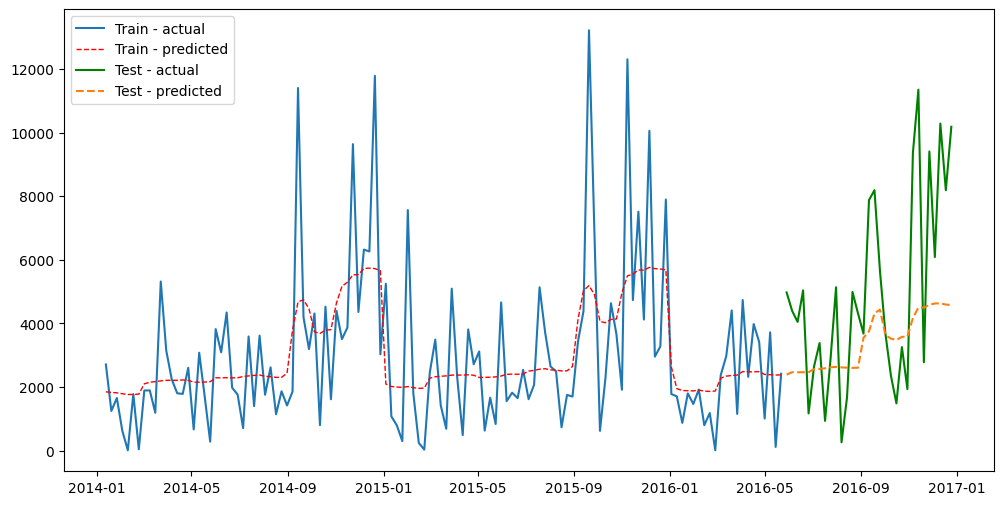

In [41]:
# Для train
train_index = data_train.index[:len(X_train)]
# Для test
test_index = data_train.index[len(X_train):len(X_train)+len(X_test)]

plt.figure(figsize=(12,6))

plt.plot(train_index, y_train, label="Train - actual")
plt.plot(train_index, y_pred_train, linestyle="--", color="red", label="Train - predicted", linewidth=1)

plt.plot(test_index, y_test, label="Test - actual", color='g')
plt.plot(test_index, y_pred_test, linestyle="--", label="Test - predicted")

plt.legend()
plt.show()

In [45]:
joblib.dump(model, 'CatBoost_timerows.pkl')

['CatBoost_timerows.pkl']